In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

import numpy as np 
import numpy.matlib as matlib
import matplotlib.pyplot as plt

In [52]:
dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()
train_images = train_images / 256.0
test_images = test_images / 256.0

In [53]:
float_formatter = "{:.2f}".format

In [40]:
# plot functions
def plot_flat_images(images, dim, cmap=plt.cm.viridis):
    plt.figure(figsize=(10,10))
    items=16
    for i in range(items):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(dim), cmap)
    plt.show()
    
def plot_vector(vector, cmap=plt.cm.viridis, colorBar=False):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(vector.reshape(1, vector.shape[0]), cmap)
    if colorBar:
        plt.colorbar()

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
# flatten all images and create the input layer
input_layer = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))

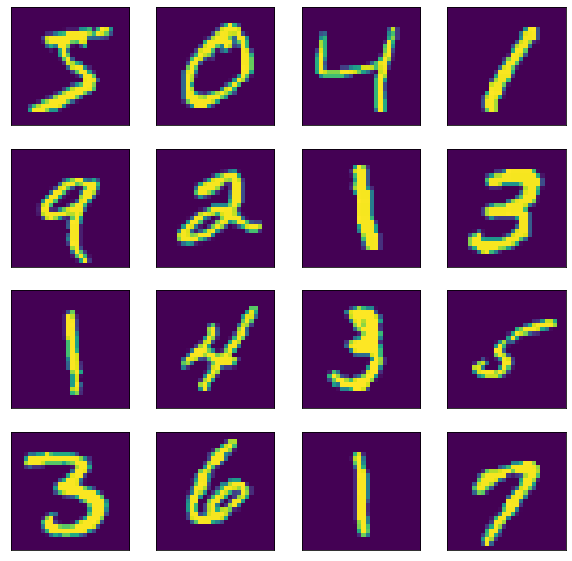

In [7]:
# Plot the first few elements of our input layer
plot_flat_images(input_layer, (train_images.shape[1], train_images.shape[2]))

In [8]:
# create some empty hidden layers
hidden_layer1 = np.zeros(16)
hidden_layer2 = np.zeros(16)
output_layer = np.zeros(10)

In [17]:
# initialize weights and biases with some random data
weights1 = np.random.rand( input_layer.shape[0], hidden_layer1.shape[0], input_layer[0].shape[0])*2 - 1
biases1 = np.random.rand( input_layer.shape[0], hidden_layer1.shape[0]) * 10

weights2 = np.random.rand( input_layer.shape[0], hidden_layer2.shape[0], hidden_layer1.shape[0])*2 - 1
biases2 = np.random.rand(  hidden_layer1.shape[0], hidden_layer2.shape[0]) * 10

weight_output = np.random.rand( input_layer.shape[0], output_layer.shape[0], hidden_layer2.shape[0])*2 - 1
biases_output = np.random.rand(  hidden_layer1.shape[0], output_layer.shape[0]) * 10

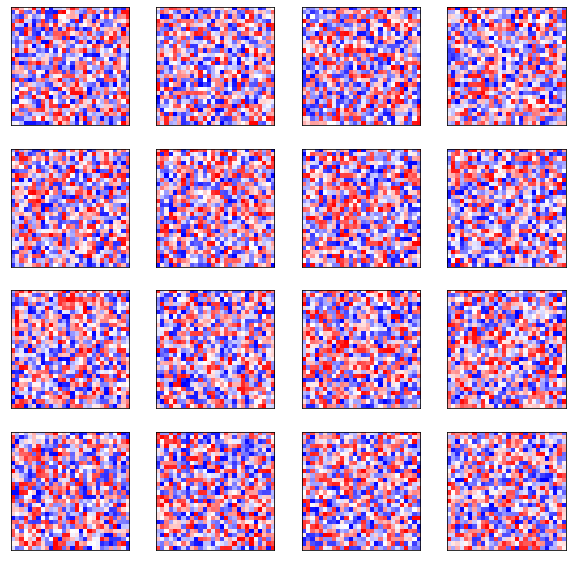

In [18]:
plot_flat_images(weights1[0], (train_images.shape[1], train_images.shape[2]), cmap=plt.cm.bwr)

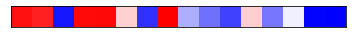

In [41]:
plot_vector(biases1[0], cmap=plt.cm.bwr)

In [20]:
#for b, w in zip(biases1, weights1):
#    sigmoid(np.dot(weights1, input_layer[0]) + biases1)

# Manual Steps (first image)

In [50]:
# create some empty hidden layers
hidden_layer1 = np.zeros(16)
hidden_layer2 = np.zeros(16)
output_layer = np.zeros(10)

hidden_layer1 = sigmoid(np.dot(weights1[0], input_layer[0]) + biases1[0])
hidden_layer2 = sigmoid(np.dot(weights2[0], hidden_layer1) + biases2[0])
output_layer = sigmoid(np.dot(weight_output[0], hidden_layer2) + biases_output[0])

In [59]:
np.set_printoptions(formatter={'float_kind':float_formatter})
hidden_layer1

array([1.00, 1.00, 0.00, 0.85, 0.99, 0.97, 0.00, 0.99, 0.97, 0.00, 0.78,
       0.59, 0.02, 0.01, 0.00, 1.00])

In [60]:
hidden_layer2

array([0.90, 1.00, 0.97, 0.99, 1.00, 1.00, 1.00, 0.37, 0.97, 1.00, 0.99,
       0.96, 0.98, 0.98, 1.00, 1.00])

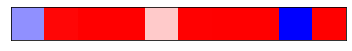

In [61]:
plot_vector(output_layer, cmap=plt.cm.bwr)

In [62]:
expected_output = np.zeros(10)
expected_output[train_labels[0]] = 1
np.sum((output_layer - expected_output)**2)

6.6623791588083225